In [1]:
import numpy as np
from scipy.signal import find_peaks, find_peaks_cwt
import soundfile as sf
from matplotlib import pyplot as plt

%matplotlib notebook


In [2]:
def printShift(shift):
    """
    param shift: should be in second
    """
    shiftInDay = 24*3600*shift
    print("Shift: {} us".format(shift*1000000))
    print("Shift in day: {} s".format(shiftInDay))

In [3]:
def calculateAccuracy(filename, plot=True):
    data, samplerate = sf.read(filename)
    if len(np.shape(data)) > 1: # Streo check
        ch1 = data[:,0]
    else:
        ch1 = data
    print("\n\n################")
    print("Filename: {}".format(filename))
    print("Samplerate: {}".format(samplerate))
    print("Min Resolution: {} us".format(1000000*(1/samplerate)))
    print("Lenght: {} - {} s".format(len(ch1), len(ch1)/samplerate))
    peaks, t= find_peaks(ch1, height=0.01, distance=samplerate-500)
    peaksTime = peaks* (1/samplerate)
    
    """
    Method 1
    """
    #peaksNo = len(peaks)-1
    #shift = ((peaksTime[peaksNo] - peaksTime[0]) - peaksNo) / peaksNo
    #printShift(shift)
    """
    Method 2
    """
    shiftList = []
    sumS = 0
    for i in range(0,len(peaksTime)-1):
        s = peaksTime[i] - peaksTime[i+1] +1
        #print(s)
        if np.abs(s) < 0.01:
            sumS += s
            shiftList.append( s )
    shift = sumS / len(shiftList)
    print(shiftList)
    printShift(shift)
    if plot==True:
        #fftPlot(ch1,samplerate)
        plt.figure()
        plt.plot(ch1)
        plt.plot(peaks, ch1[peaks], "x")
    
    
    

In [4]:
def fftPlot(ch1, samplerate):
    freq = np.arange(0,samplerate, samplerate/len(ch1))
    plt.figure()
    plt.plot(freq, np.fft.fft(ch1))
    #plt.xlim(0,100)


In [ ]:
calculateAccuracy("test5.wav", plot=False)
calculateAccuracy("test6.wav", plot=False)
calculateAccuracy("test7.wav", plot=False)
calculateAccuracy("test8.wav", plot=False)
calculateAccuracy("test9.wav", plot=False)
calculateAccuracy("test10.wav", plot=False)



################
Filename: test5.wav
Samplerate: 44100
Min Resolution: 22.675736961451246 us
Lenght: 545664 - 12.373333333333333 s
[-0.0046712018140593337, 0.0047845804988666529, -0.00020408163265361878, 0.0076190476190483025]
Shift: 1882.0861678005008 us
Shift in day: 162.61224489796325 s


################
Filename: test6.wav
Samplerate: 44100
Min Resolution: 22.675736961451246 us
Lenght: 585984 - 13.287619047619048 s
[-2.2675736961463855e-05, 0.00018140589569148879, -0.0039682539682539542, 0.003990929705215418, -0.0038775510204080987, 0.0041950113378685927, -0.0010884353741484887, 0.0037868480725613551, -0.00079365079364990265, -0.0026984126984128665]
Shift: -29.47845804979199 us
Shift in day: -2.546938775502028 s


################
Filename: test7.wav
Samplerate: 44100
Min Resolution: 22.675736961451246 us
Lenght: 577920 - 13.104761904761904 s
[0.0013605442176870541, 0.0002494331065761024, 0.00013605442176878313, 0.00061224489795907999, -0.0058049886621320823, -0.0002947845804985



################
Filename: test9.wav
Samplerate: 44100
Min Resolution: 22.675736961451246 us
Lenght: 532224 - 12.06857142857143 s
[0.0057369614512472467, -0.0020634920634921006, -0.0015873015873015817, -0.0011111111111108407, 0.0015646258503396737, -0.0014285714285717788, 0.0014965986394566144, 0.0019954648526070429, -0.0021315192743767142, 0.002312925170068425, 0.00068027210884302747]
Shift: 496.8047825190013 us
Shift in day: 42.92393320964171 s


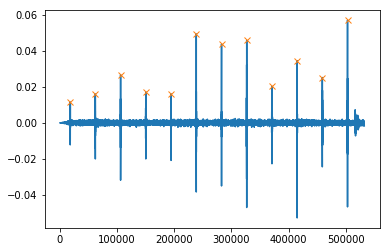

In [16]:
calculateAccuracy("test9.wav")



################
Filename: test7.wav
Samplerate: 44100
Min Resolution: 22.675736961451246 us
Lenght: 577920 - 13.104761904761904 s
[0.0013605442176870541, 0.0002494331065761024, 0.00013605442176878313, 0.00061224489795907999, -0.0058049886621320823, -0.00029478458049858602, 0.0021768707482996419, -0.00099773242630352144, -0.0039682539682548423, 0.0058276643990939903, -0.0056235827664412597, 0.0028798185941045773]
Shift: -287.2260015117552 us
Shift in day: -24.81632653061565 s


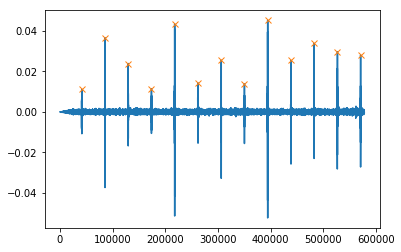

In [17]:
calculateAccuracy("test7.wav")

In [ ]:
calculateAccuracy("test1-long.wav")